## 한겨레 신문의 오늘의 뉴스 기사 제목을 크롤링


In [5]:
import requests
from bs4 import BeautifulSoup

url = "https://www.hani.co.kr/arti/list.html?sec=news&subsec=politics"
response = requests.get(url)

soup = BeautifulSoup(response.text, "html.parser")
titles = soup.find_all("h4", class_="article-title") #개발자 도구로 확인해야함
#print(titles)
for title in titles:
    print(title.text)
    #print(title.text.strip())



154만원에 낙찰된 20억 ‘거제 거북선’, 결국 철거되나 

서울백병원 문 닫으면? 중구보건소 “도심 응급의료 공백 우려” 

[속보] 이규민 평가원장 “6월 모의평가 책임지고 사임” 

사교육 부르는 ‘킬러 문항’ 죽이고 ‘사교육 핵심’ 자사고는 살린다 

평범한 우리도, 세상을 바꿀 수 있다 

인간중심 간호 전문인재 양성…‘국시 100% 합격’ 

뜨겁다 뜨거워…폭염에도 삶은 계속되고, 방법은 다 있다 

낮에 모인 ‘육퇴’ 동지들 “엄마가 행복해야 아이도 행복하다” 

“오래된 물건 자랑하랬더니, 엄마아빠 쓰던 연필깎이 갖고 와” 

‘오징어 게임 2’ 캐스팅 영상에 여성 0…넷플릭스에 물어보니 

‘킬러 문항→사교육비→저출산’ 윤 대통령의 문제의식 배경 

대안학교 가려면 지금부터 ‘발품’…2박3일 면접 보는 곳도 

경기부양 욕심이 키운 ‘카드대란’ 연착륙에 성공하다 

14살 스페이스X 신입사원 “채용 때 나이 편견 버리길 희망” 

파업 유발시킨 ‘회사 불법’ 방치한 대법 판결…노란봉투법이 답이다 


## Beautifulsoup 객체에서 주로 사용되는 메서드
### find(): 조건에 맞는 첫 번째 태그를 찾아 반환합니다.
Name: 태그 이름을 지정합니다.<br>
Attrs: 태그의 속성과 값을 지정합니다.<br>
Recursive: 하위 태그를 포함하여 검색할지 여부를 지정합니다.<br>

### Find_all(): 조건에 맞는 모든 태그를 찾아 리스트형태로 반환합니다.
name: 태그 이름을 지정합니다.<br>
attrs: 태그의 속성과 값을 지정합니다.<br>
recursive: 하위 태그를 포함하여 검색할지 여부를 지정합니다.<br>
limit: 반환할 최대 태그 개수를 지정합니다.<br>

### select_one() 메서드는 선택된 태그 중에서 첫 번째 태그만을 반환합니다.

### select(): CSS 선택자를 이용하여 선택된 모든 태그를 리스트 형태로 반환합니다. 

### text(): 태그의 텍스트 내용을 반환합니다.
### get(): 태그의 속성 값을 반환합니다.


## Beautifulsoup 객체 메서드
find_parents(): 해당 태그의 모든 부모 태그를 반환합니다. 반환값은 ResultSet 객체입니다.<br>
find_parent(): 해당 태그의 첫 번째 부모 태그를 반환합니다. 반환값은 Tag 객체입니다.<br>
find_next_siblings(): 해당 태그 다음에 나오는 모든 형제 태그들을 반환합니다. 반환값은 ResultSet 객체입니다.<br>
find_next_sibling(): 해당 태그 다음에 나오는 첫 번째 형제 태그를 반환합니다. 반환값은 Tag 객체입니다.<br>
find_previous_siblings(): 해당 태그 이전에 나온 모든 형제 태그들을 반환합니다. 반환값은 ResultSet 객체입니다.<br>
find_previous_sibling(): 해당 태그 이전에 나온 첫 번째 형제 태그를 반환합니다. 반환값은 Tag 객체입니다.


In [6]:
from bs4 import BeautifulSoup

html = '''
<html>
<body>
<div class="menu">
    <ul>
        <li><a href="/home">Home</a></li>
        <li><a href="/about">About</a></li>
        <li><a href="/contact">Contact</a></li>
    </ul>
</div>
<div class="content">
    <h1>Hello, World!</h1>
    <p>This is an example of using Beautifulsoup.</p>
</div>
</body>
</html>
'''

soup = BeautifulSoup(html, 'html.parser')

# find() 메서드 사용 예시
div_menu = soup.find('div', {'class': 'menu'})
print(div_menu)

# find_all() 메서드 사용 예시
links = soup.find_all('a')
for link in links:
    print(link.get('href'))


<div class="menu">
<ul>
<li><a href="/home">Home</a></li>
<li><a href="/about">About</a></li>
<li><a href="/contact">Contact</a></li>
</ul>
</div>
/home
/about
/contact


In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://movie.daum.net/ranking/reservation'
response = requests.get(url)

soup = BeautifulSoup(response.text, 'html.parser')
movie =[]
ol = soup.select_one(".list_movieranking")
#ol
li_list = ol.find_all("li")
#li_list[0]
for li in li_list:
    rank = li.select_one(".rank_num").text
    name = li.select_one(".link_txt").text
    see = li.select_one(".ico_see").text
    grade = li.select_one(".txt_grade").text
    num = li.select_one(".txt_num").text[:-1]
    mvdate = li.select_one(".txt_info > .txt_num").text
    movie.append([rank,name,see,grade,num,mvdate])
    df = pd.DataFrame(movie,columns=["순위","영화명","관람가","평점","예매율","개봉일"])
    print(rank,name,see)
df.to_csv('movie_info.csv', index=False, encoding='cp949')
df = pd.read_csv('movie_info.csv', encoding='cp949')
df.sort_values('평점', ascending=False)
df["개봉일"] = pd.to_datetime(df["개봉일"], format="%y.%m.%d")
df.head()

1 스파이더맨: 어크로스 더 유니버스 전체관람가
2 귀공자 청소년관람불가
3 엘리멘탈 전체관람가
4 범죄도시3 15세이상관람가
5 플래시 12세이상관람가
6 명탐정코난: 하이바라 아이 이야기 ~흑철의 미스터리 트레인 12세이상관람가
7 수라 전체관람가
8 파이어하트 전체관람가
9 트랜스포머: 비스트의 서막 12세이상관람가
10 비의도적 연애담 스페셜 12세이상관람가
11 인디아나 존스: 운명의 다이얼 12세이상관람가
12 가디언즈 오브 갤럭시: Volume 3 12세이상관람가
13 인드림 청소년관람불가
14 너의 눈을 들여다보면 전체관람가
15 어디로 가고 싶으신가요 12세이상관람가
16 마마무: 마이콘 더 무비 전체관람가
17 1986 그 여름, 그리고 고등어통조림 12세이상관람가
18 남은 인생 10년 12세이상관람가
19 엔니오: 더 마에스트로 12세이상관람가
20 굿바이 12세이상관람가


,순위,영화명,관람가,평점,예매율,개봉일
0,1,스파이더맨: 어크로스 더 유니버스,전체관람가,8.9,26.4,2023-06-21
1,2,귀공자,청소년관람불가,8.6,21.0,2023-06-21
2,3,엘리멘탈,전체관람가,8.8,16.0,2023-06-14
3,4,범죄도시3,15세이상관람가,6.7,13.1,2023-05-31
4,5,플래시,12세이상관람가,8.0,6.6,2023-06-14


c:\Python\lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'anime.onnada.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 3 to 102
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   순위      100 non-null    object
 1   애니명     100 non-null    object
 2   카테고리    100 non-null    object
 3   개봉일     100 non-null    object
dtypes: object(4)
memory usage: 3.3+ KB


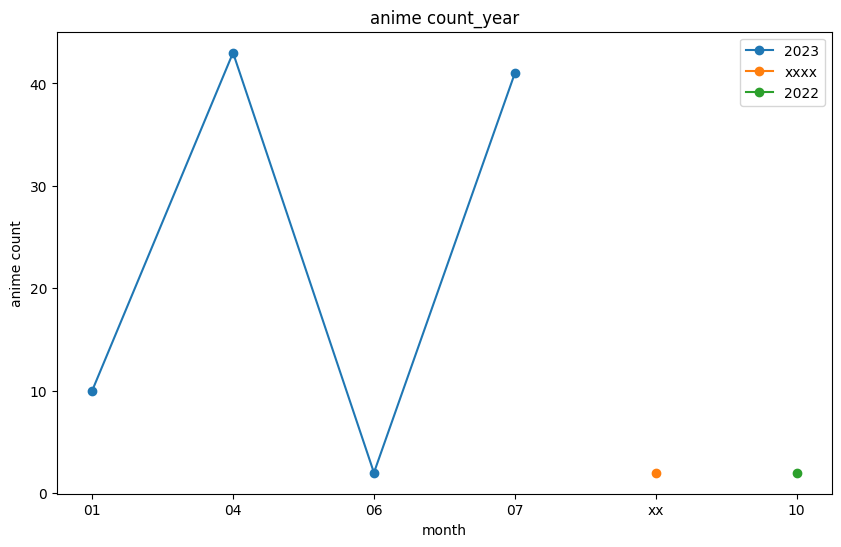

In [48]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

s= [] #data넣는 곳
code = '530053'
url = f'https://anime.onnada.com/rank.php?code={code}'


response = requests.get(url, headers={'User-agent': 'Mozilla/5.0 '}, verify=False)

soup = BeautifulSoup(response.text, "html.parser")

tbody = soup.select_one(".layout-line")
tr_list = tbody.select(".array")

for td in tr_list:
    rank_element = td.select_one(".rank")
    maintitle_element = td.select_one(".maintitle")
    category_element = td.select_one(".category")
    date_element = td.select_one(".date")
    
    rank = rank_element.text if rank_element else None
    maintitle = maintitle_element.text if maintitle_element else None
    category = category_element.text if category_element else None
    date = date_element.text if date_element else None
    
    s.append([rank, maintitle, category, date])

df = pd.DataFrame(s, columns=["순위", "애니명", "카테고리", "개봉일"])

df = df.drop([0, 1,2])
df.info()
# "개봉일" 열에서 년도와 월 정보 추출
df['년도'] = df['개봉일'].str.split('.').str[0]
df['월'] = df['개봉일'].str.split('.').str[1]

# 각 년도에 대해 월별 애니메이션 수 계산
yearly_anime_counts = {}
for year in df['년도'].unique():
    yearly_df = df[df['년도'] == year]
    monthly_anime_counts = yearly_df['월'].value_counts().sort_index()
    yearly_anime_counts[year] = monthly_anime_counts

# 그래프 생성
plt.figure(figsize=(10, 6))
for year, counts in yearly_anime_counts.items():
    plt.plot(counts.index, counts.values, marker='o', label=year)
plt.xlabel('month')
plt.ylabel('anime count')
plt.title('anime count_year')
plt.legend()
plt.show()



In [57]:
#av배우 크롤링

from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import pandas as pd

s =[] #데이터 저장할 공간
url = "https://www.avdbs.com/menu/actor_ranking.php?tab=year"
wd = webdriver.Chrome()
wd.get(url)  # 페이지를 가져옴
time.sleep(1)  # 페이지가 로드되기까지 대기

soup = BeautifulSoup(wd.page_source, "html.parser")
#list = soup.select(".lst")
#print(list)
ul = soup.find("ul",class_ = "lst")
#print("--->",list)
list = ul.select("li")
list
for li in list:
     
    data_idx = li["data-idx"]
    print("Clicking item with data-idx:",data_idx)
    link = li.find("a")
    print("link",link["href"])
    if "login" in link["href"]:
        print("Found 'login' in link. Stopping the loop.")
        break
    wd.get("https://www.avdbs.com/"+link["href"])
    name = wd.find_element(By.CSS_SELECTOR, ".inner_name_kr").text
    name_jp = wd.find_element(By.CSS_SELECTOR,".inner_name_cn").text
    birth = wd.find_element(By.CSS_SELECTOR, ".profile_birth").text
    height = wd.find_element(By.CSS_SELECTOR, ".profile_height").text
    size = wd.find_element(By.CSS_SELECTOR, ".profile_size").text
    bra_size = wd.find_element(By.CSS_SELECTOR, ".profile_bra_size").text
    debut = wd.find_element(By.CSS_SELECTOR, ".profile_debut_date").text
    s.append([name,name_jp, birth, height, size,bra_size,debut])
    time.sleep(2)
    wd.back()
df = pd.DataFrame(s, columns=["이름","일본이름", "생년월일", "신장(cm)", "사이즈","가슴사이즈","데뷔일"])#데이터 뽑아서 데이터프레임 만들기
df.to_csv('avActress_info.csv', index=False, encoding='utf-8') #csv파일로 저장
df = pd.read_csv('avActress_info.csv', encoding='utf-8') #csv파일 불러오기

df

Clicking item with data-idx: 8728
link /menu/actor.php?actor_idx=8728
Clicking item with data-idx: 8130
link /menu/actor.php?actor_idx=8130
Clicking item with data-idx: 8619
link /menu/actor.php?actor_idx=8619
Clicking item with data-idx: 3884
link /menu/actor.php?actor_idx=3884
Clicking item with data-idx: 1224
link /menu/actor.php?actor_idx=1224
Clicking item with data-idx: 6368
link /menu/actor.php?actor_idx=6368
Clicking item with data-idx: 5569
link /menu/actor.php?actor_idx=5569
Clicking item with data-idx: 8391
link /menu/actor.php?actor_idx=8391
Clicking item with data-idx: 2426
link /menu/actor.php?actor_idx=2426
Clicking item with data-idx: 2319
link /menu/actor.php?actor_idx=2319
Clicking item with data-idx: 5908
link /menu/actor.php?actor_idx=5908
Clicking item with data-idx: 2583
link /menu/actor.php?actor_idx=2583
Clicking item with data-idx: 2309
link /menu/actor.php?actor_idx=2309
Clicking item with data-idx: 777
link /menu/actor.php?actor_idx=777
Clicking item with dat

,이름,일본이름,생년월일,신장(cm),사이즈,가슴사이즈,데뷔일
0,카미키 레이,神木麗,1999-12-20,신장 : 169 cm,B95 / W60 / H85,컵사이즈 : G 컵,데뷔 : 22년 04월 데뷔
1,이시카와 미오,石川澪,2002-03-20,신장 : 158 cm,B82 / W58 / H86,컵사이즈 : B 컵,데뷔 : 21년 10월 데뷔
2,이치노 아오이,一乃あおい,1989-09-16,신장 : 165 cm,B93 / W59 / H90,컵사이즈 : G 컵,데뷔 : 22년 03월 데뷔
3,카와키타 사이카,河北彩花,1999-04-24,신장 : 169 cm,B88 / W59 / H89,컵사이즈 : E 컵,데뷔 : 18년 04월 데뷔
4,스즈무라 아이리,鈴村あいり,1993-09-24,신장 : 152 cm,B82 / W53 / H80,컵사이즈 : D 컵,데뷔 : 13년 02월 데뷔
5,아오이 이부키,葵いぶき,2001-05-18,신장 : 162 cm,B80 / W59 / H90,컵사이즈 : G 컵,데뷔 : 20년 07월 데뷔
6,스즈모리 레무,涼森れむ,1997-12-03,신장 : 160 cm,B87 / W58 / H85,컵사이즈 : D 컵,데뷔 : 19년 03월 데뷔
7,츠바사 마이,つばさ舞,1999-05-08,신장 : 165 cm,B90 / W58 / H88,컵사이즈 : G 컵,데뷔 : 21년 12월 데뷔
8,아이자와 미나미,相沢みなみ,1996-06-14,신장 : 155 cm,B80 / W54 / H82,컵사이즈 : C 컵,데뷔 : 16년 09월 데뷔
9,하시모토 아리나,橋本ありな,1996-12-15,신장 : 167 cm,B84 / W56 / H83,컵사이즈 : C 컵,데뷔 : 16년 03월 데뷔


In [57]:

import pandas as pd
import re
df = pd.read_csv('avActress_info.csv', encoding='utf-8')
#print(df.head(3))
df.insert(0,"순위",range(1,len(df)+1),1)
df["생년월일"] = df["생년월일"].str.split("(").str[0]
df["생년월일"] = df["생년월일"].str.split(":").str[1]
#df["신장(cm)"] = re.findall(r"\d",df["신장(cm)"])
df["신장(cm)"] = df["신장(cm)"].str.split(":").str[1].str.split(" ").str[1]
df["사이즈"] =df["사이즈"].str.strip().str.split(":").str[1].str.split("/")
sizes = df['사이즈'].str.split(",")

df[['Breast', 'Waist', 'Hip']] = sizes[[0, 1, 2]].apply(lambda x: x.str.strip())

df["가슴사이즈"] = df["가슴사이즈"].str.split(":").str[1].str.split(" ").str[1]
df["데뷔일"] = df["데뷔일"].str.split(":").str[1].str.findall(r"(\d+)")

#pattern = r"\d+"

#df["데뷔일"] = re.findall(pattern,df["데뷔일"])
#df["가슴사이즈"] = re.findall(r"\w",df["가슴사이즈"])
df





KeyError: '[1, 2] not in index'